## ДОМАШНЯЯ РАБОТА 4

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

### 1. Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)

In [6]:
iris = load_iris()
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [11]:
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['class'] = iris.target

In [12]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


### 2. Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety

In [14]:
df_small = df[['sepal length (cm)', 'sepal width (cm)', 'class']]
df_small.head()

,sepal length (cm),sepal width (cm),class
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0


### 3. Разделите данные на выборку для обучения и тестирования

In [41]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(df_small, test_size=0.2)

In [42]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 103 to 73
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
 2   class              120 non-null    int32  
dtypes: float64(2), int32(1)
memory usage: 3.3 KB


In [43]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 77 to 126
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  30 non-null     float64
 1   sepal width (cm)   30 non-null     float64
 2   class              30 non-null     int32  
dtypes: float64(2), int32(1)
memory usage: 840.0 bytes


In [44]:
y_train, y_test = df_train['class'], df_test['class']
del df_train['class']
del df_test['class']

In [45]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120 entries, 103 to 73
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  120 non-null    float64
 1   sepal width (cm)   120 non-null    float64
dtypes: float64(2)
memory usage: 2.8 KB


### 4. Постройте модель LDA

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [47]:
lda = LinearDiscriminantAnalysis()

In [48]:
lda.fit(df_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [49]:
lda.predict(df_test)

array([2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 1])

In [50]:
result = pd.DataFrame([y_test.values, lda.predict(df_test)]).T
result

,0,1
0,1,2
1,0,0
2,2,2
3,0,0
4,0,0
5,1,1
6,1,1
7,2,2
8,2,2
9,1,1


In [51]:
from sklearn.metrics import accuracy_score

In [52]:
accuracy_score(y_test, lda.predict(df_test))

0.8

Модель предсказывает правильный класс цветка с точностью 80%

In [64]:
lda.coef_

array([[-5.90747504,  8.66970083],
       [ 1.34867008, -3.65718345],
       [ 3.83319045, -3.77982895]])

0 класс значительно отличается от остальных. У классов 1 и 2 схожая величина влияния признака sepal width

In [65]:
from sklearn.linear_model import LogisticRegression

In [66]:
lr = LogisticRegression()

In [67]:
lr.fit(df_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [68]:
lr.predict(df_test)

array([2, 0, 2, 0, 0, 1, 1, 2, 2, 1, 0, 1, 0, 2, 1, 1, 1, 2, 0, 0, 0, 0,
       0, 1, 2, 0, 0, 0, 1, 1])

In [69]:
result_lr = pd.DataFrame([y_test.values, lr.predict(df_test)]).T
result_lr

,0,1
0,1,2
1,0,0
2,2,2
3,0,0
4,0,0
5,1,1
6,1,1
7,2,2
8,2,2
9,1,1


In [70]:
accuracy_score(y_test, lr.predict(df_test))

0.8

Процент предсказания модели, постороенной по логистической регрессии аналогичен дискрименантному анализу.

### 5. Визуализируйте предсказания для тестовой выборки и центры классов

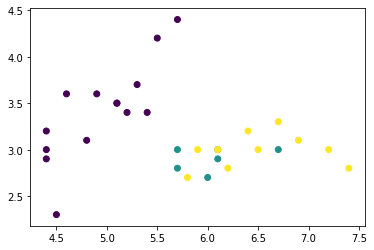

In [60]:
plt.scatter(df_test['sepal length (cm)'], df_test['sepal width (cm)'], c=y_test)
plt.show()

In [61]:
lda.means_

array([[5.02777778, 3.43333333],
       [5.92045455, 2.75227273],
       [6.6075    , 2.97      ]])

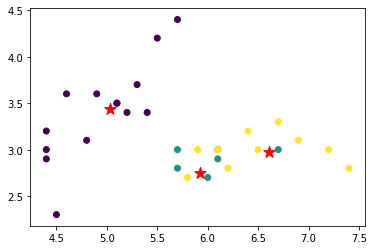

In [62]:
plt.scatter(df_test['sepal length (cm)'], df_test['sepal width (cm)'], c=y_test)
plt.scatter(lda.means_[:, 0], lda.means_[:, 1], c='r', s=150, marker='*')
plt.show()

### 6. Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width

In [63]:
df_small_pred = df[['sepal length (cm)', 'sepal width (cm)']]
df_small_pred.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


### 7. Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [75]:
from sklearn.cluster import KMeans

**визуализируем текущее количество классов**

In [97]:
kmeans3 = KMeans(n_clusters=3)
clusters = kmeans3.fit_predict(df_small_pred)
clusters

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

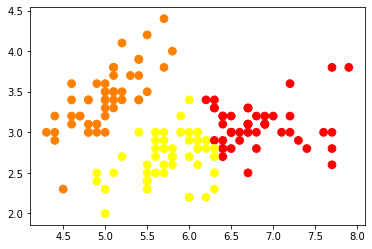

In [98]:
plt.scatter(df_small_pred['sepal length (cm)'], df_small_pred['sepal width (cm)'],cmap='autumn', c=clusters, s=60)

**Подберем оптимальное количество классов**

In [95]:
k_inertia = []
ks = range(1,11)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(df_small_pred)
    k_inertia.append(clf_kmeans.inertia_)

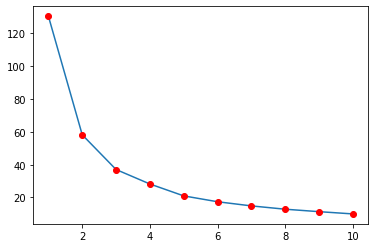

In [96]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

***на мой взгляд, можно разделить данные на 4 класса, далее линия похожа на прямую***

In [106]:
kmeans4 = KMeans(n_clusters=4)
clusters4 = kmeans4.fit_predict(df_small_pred)
clusters4

array([2, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 0, 0, 2, 2, 2, 0, 0, 2, 2, 0, 2, 2, 0, 0, 2,
       2, 0, 2, 0, 2, 2, 1, 1, 1, 3, 1, 3, 1, 0, 1, 0, 0, 3, 3, 3, 3, 1,
       3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 1, 3, 1, 3, 1, 1, 0, 1, 1, 1,
       1, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 1, 3, 1, 1, 3, 3, 3, 1, 1, 1,
       3, 3, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 3])

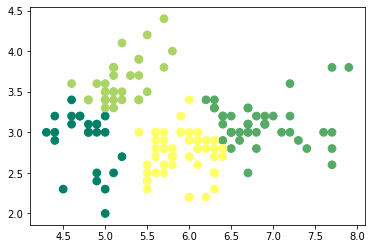

In [107]:
plt.scatter(df_small_pred['sepal length (cm)'], df_small_pred['sepal width (cm)'],cmap='summer', c=clusters4, s=60)

**с нормализацией данных** - не понятно, нужно ли проводить нормализацию в данном случае?

In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
scaler = StandardScaler()

In [87]:
df_small_pred_scaled = scaler.fit_transform(df_small_pred)

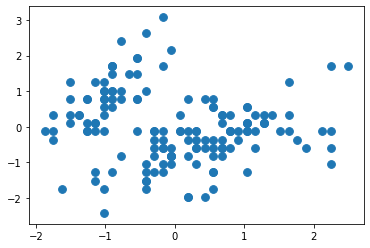

In [89]:
plt.scatter(df_small_pred_scaled[:, 0], df_small_pred_scaled[:, 1],cmap='autumn', s=60)

In [90]:
kmeans_scaled = KMeans(n_clusters=3)
clusters_scaled = kmeans.fit_predict(df_small_pred_scaled)
clusters_scaled

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1])

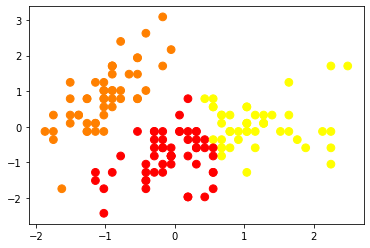

In [93]:
plt.scatter(df_small_pred_scaled[:, 0], df_small_pred_scaled[:, 1],cmap='autumn', c=clusters, s=60)
# не понятно, почесу вместо столбцов нужно указывать [:, 0] и [:, 1]?